***
**Importing necessary libraries**
***

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

***
**Merging Google Drive**
***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***
**Dataset Path**
***

In [3]:
dataset='/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/CNN'

***
**Installing and importing mne for reading EEG data**
***

In [4]:
!pip install mne

     |████████████████████████████████| 6.9 MB 6.7 MB/s 


In [5]:
import mne

***
**Creating Classes**
***


In [6]:
class_names = ['Healthy', 'MDD']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

***
**Data Preprocessing**
***

In [7]:
images = []
labels = []
output=[]
IMAGE_SIZE = (255, 255)
print("Loading {}".format(dataset))

# Iterate through each folder corresponding to a category
for folder in os.listdir(dataset):
    label = class_names_label[folder]
    
    # Iterate through each image in our folder
    for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        
        # Get the path name of the image
        img_path = os.path.join(os.path.join(dataset, folder), file)

        # Open and resize the img
        image = cv2.imread(img_path)
        image = image[6:208,92:420]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
        
        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)

images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32')

output.append((images, labels))

Loading /content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/CNN


100%|██████████| 710/710 [03:22<00:00,  3.50it/s]


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)

***
**Creating the 2D CNN model**
***

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (255, 255, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(48, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    # tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        1

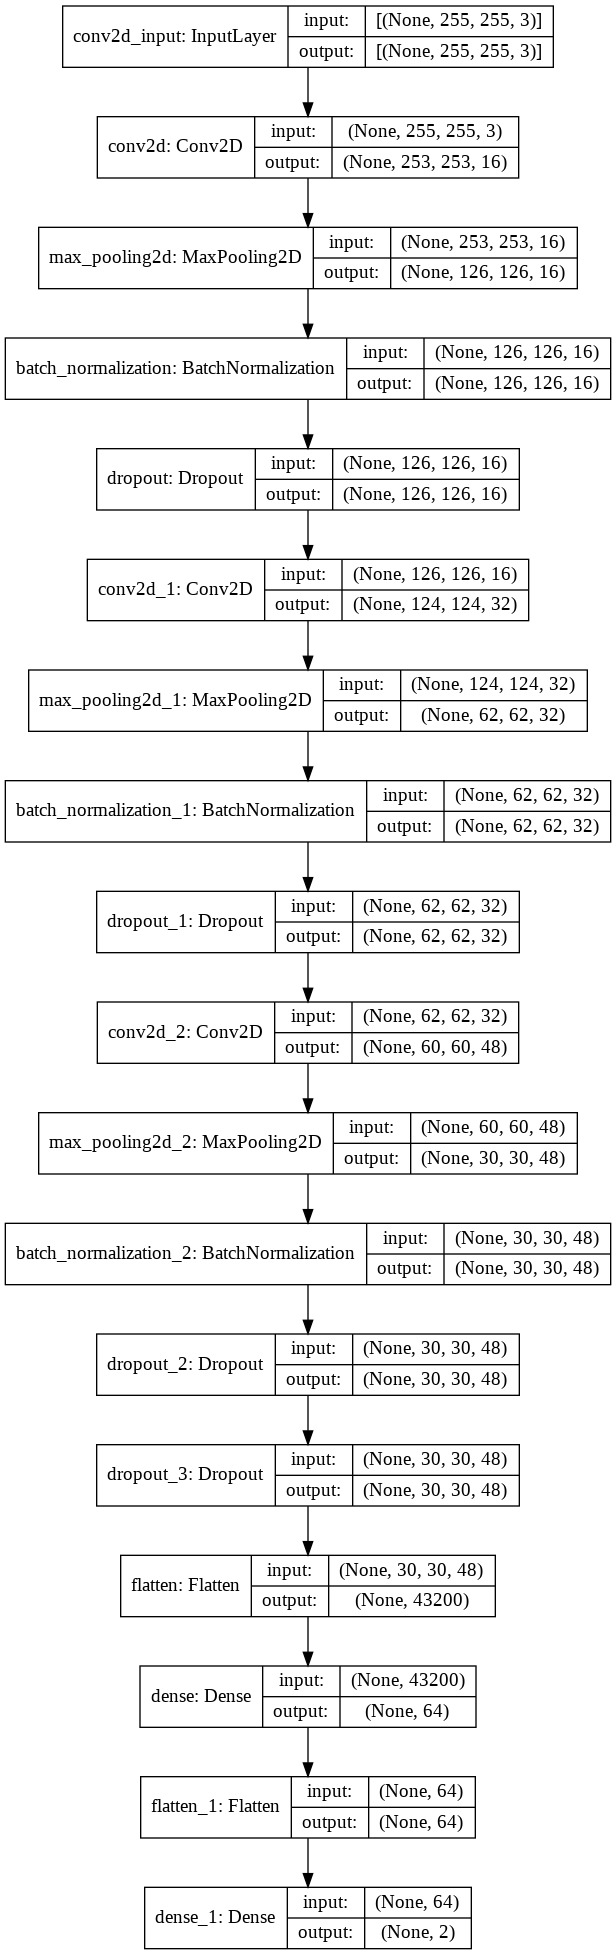

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

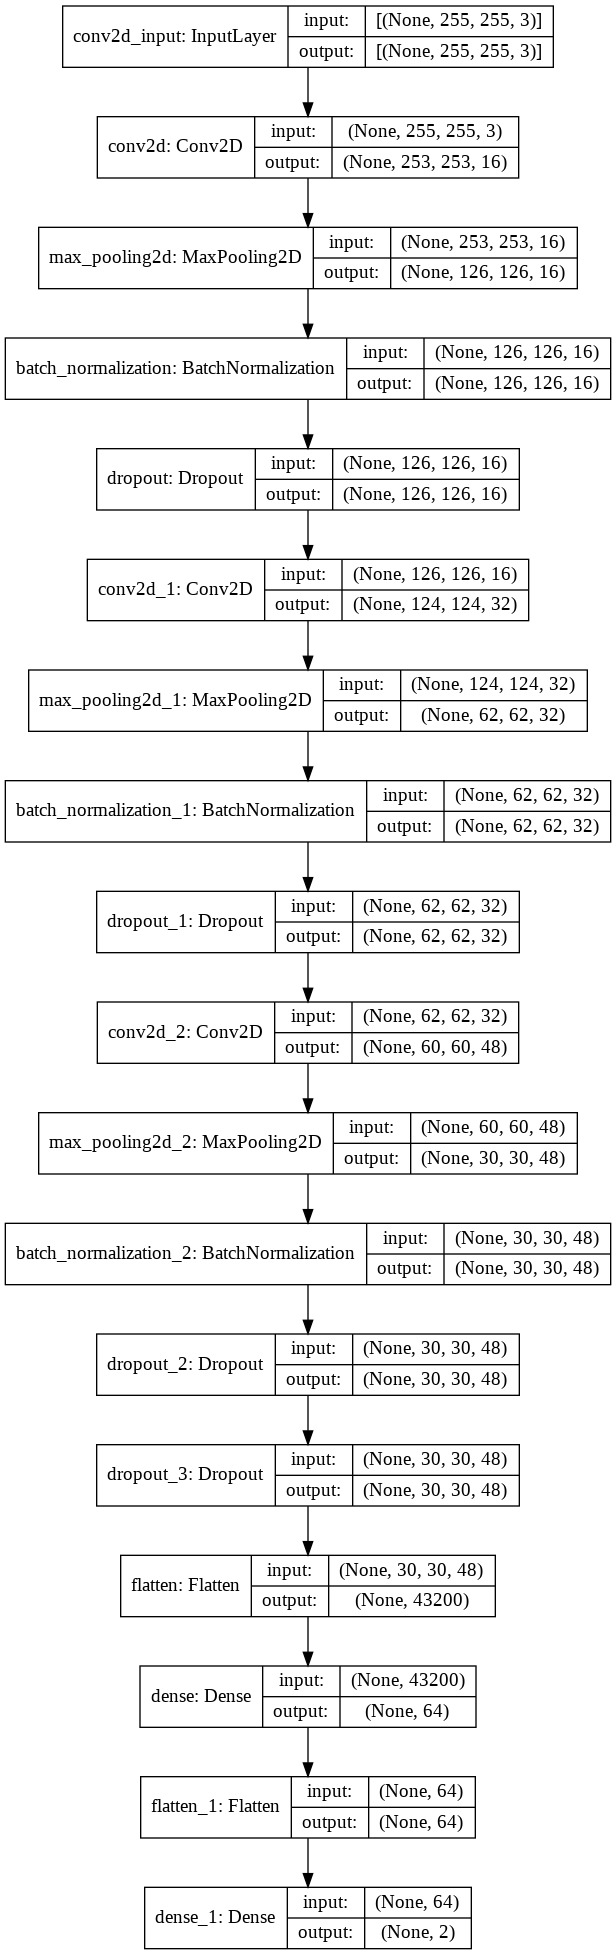

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

***
**Accuracy Level**
***

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

***
**Data Training**
***

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)

ephocs=50
mod = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=8, epochs=ephocs,
                    callbacks =[earlystopping]
                    )

Epoch 1/50
148/148 [==============================] - 81s 542ms/step - loss: 1.7215 - accuracy: 0.6909 - val_loss: 5.5898 - val_accuracy: 0.4833
Epoch 2/50
148/148 [==============================] - 81s 544ms/step - loss: 0.4266 - accuracy: 0.8069 - val_loss: 3.4082 - val_accuracy: 0.5359
Epoch 3/50
148/148 [==============================] - 80s 544ms/step - loss: 0.3399 - accuracy: 0.8374 - val_loss: 0.4186 - val_accuracy: 0.8182
Epoch 4/50
148/148 [==============================] - 81s 550ms/step - loss: 0.2264 - accuracy: 0.9018 - val_loss: 0.2113 - val_accuracy: 0.9378
Epoch 5/50
148/148 [==============================] - 82s 551ms/step - loss: 0.1480 - accuracy: 0.9382 - val_loss: 0.1985 - val_accuracy: 0.9282
Epoch 6/50
148/148 [==============================] - 81s 547ms/step - loss: 0.1248 - accuracy: 0.9475 - val_loss: 0.1931 - val_accuracy: 0.9378
Epoch 7/50
148/148 [==============================] - 81s 547ms/step - loss: 0.0632 - accuracy: 0.9763 - val_loss: 0.1205 - val_ac

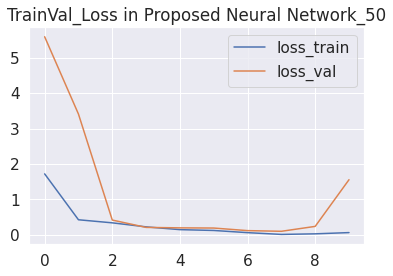

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(mod.history['loss'], label='loss_train')
plt.plot(mod.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('TrainVal_Loss in Proposed Neural Network_50')
plt.show()
plt.savefig('LossVal_loss')

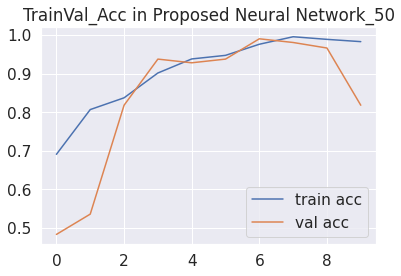

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network_50')
plt.show()
plt.savefig('AccVal_acc')